In [ ]:
!pip uninstall -y torch-scatter torch-sparse torch-cluster torch-spline-conv
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install torch torchvision torchaudio torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric -f https://data.pyg.org/whl/torch-2.0.1+cu117.html
!pip install pandas==2.2.2
!pip install gensim


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.0/494.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.9/750.9 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 4.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.0.1+cu117.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 M

In [ ]:
!pip install --force-reinstall torch-geometric

In [ ]:
!pip install --upgrade --force-reinstall pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 21.6 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

file_path = "/content/lncRNA_disease.csv"
df = pd.read_csv(file_path, encoding="utf-8")

print("✅ Dataset Preview:\n", df.head())

# Handle Missing Values (if any)
df.dropna(subset=["lncRNA", "Disease_Name"], inplace=True)

# Encode categorical values for graph processing
le_lncRNA = LabelEncoder()
le_disease = LabelEncoder()

df["lncRNA_Encoded"] = le_lncRNA.fit_transform(df["lncRNA"])
df["Disease_Encoded"] = le_disease.fit_transform(df["Disease_Name"])


print("\n✅ Encoded Sample:\n", df[["lncRNA", "lncRNA_Encoded", "Disease_Name", "Disease_Encoded"]].head())

processed_file_path = "/content/lncRNA_disease_encoded.csv"
df.to_csv(processed_file_path, index=False)

print("\n✅ Processed dataset saved successfully!")

#  Save the encoders for consistency in later steps
import pickle
with open("/content/label_encoders.pkl", "wb") as f:
    pickle.dump({"lncRNA": le_lncRNA, "Disease": le_disease}, f)

print("\n✅ Label Encoders Saved!")

✅ Dataset Preview:
         lncRNA               Disease_Name
0  ARHGAP5-AS1  Carcinoma, Hepatocellular
1       HOTTIP               Osteosarcoma
2       HOTTIP                     Glioma
3       HOTTIP             Retinoblastoma
4       HOTTIP          stomach carcinoma

✅ Encoded Sample:
         lncRNA  lncRNA_Encoded               Disease_Name  Disease_Encoded
0  ARHGAP5-AS1             337  Carcinoma, Hepatocellular               52
1       HOTTIP            1293               Osteosarcoma              256
2       HOTTIP            1293                     Glioma              137
3       HOTTIP            1293             Retinoblastoma              297
4       HOTTIP            1293          stomach carcinoma              430

✅ Processed dataset saved successfully!

✅ Label Encoders Saved!


In [ ]:
import networkx as nx
import pandas as pd

G = nx.Graph()

# Add lncRNA and Disease Nodes
lncRNA_nodes = df["lncRNA_Encoded"].unique()
disease_nodes = df["Disease_Encoded"].unique()

G.add_nodes_from(lncRNA_nodes, bipartite=0)  # lncRNA nodes (one partition)
G.add_nodes_from(disease_nodes, bipartite=1)  # Disease nodes (other partition)

# Add Edges for Known Interactions
edges = list(zip(df["lncRNA_Encoded"], df["Disease_Encoded"]))
G.add_edges_from(edges)

# Assign Edge Attributes
nx.set_edge_attributes(G, {edge: "interaction" for edge in edges}, "edge_type")


print("\n✅ HIN Construction Complete!")
print(f"🔹 Total Nodes: {G.number_of_nodes()}")
print(f"🔹 Total Edges: {G.number_of_edges()}")
print(f"🔹 Example Edges: {list(G.edges(data=True))[:5]}")



✅ HIN Construction Complete!
🔹 Total Nodes: 5316
🔹 Total Edges: 9897
🔹 Example Edges: [(337, 52, {'edge_type': 'interaction'}), (337, 40, {'edge_type': 'interaction'}), (337, 4291, {'edge_type': 'interaction'}), (337, 122, {'edge_type': 'interaction'}), (1293, 256, {'edge_type': 'interaction'})]


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim
!pip install pandas==2.2.2

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [ ]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall gensim
!pip install pandas==2.2.2

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using 

ERROR: Operation cancelled by user
^C


In [ ]:
import numpy as np
from gensim.models import Word2Vec
import random


# Extract unique nodes
lncRNA_nodes = df["lncRNA_Encoded"].unique().tolist()
disease_nodes = df["Disease_Encoded"].unique().tolist()

# Assign node types correctly
for node in lncRNA_nodes:
    if node in G:
        G.nodes[node]["node_type"] = "lncRNA"

for node in disease_nodes:
    if node in G:
        G.nodes[node]["node_type"] = "Disease"


# Define Meta-Paths
meta_paths = [
    ('lncRNA', 'Disease', 'lncRNA'),
    ('Disease', 'lncRNA', 'Disease'),
    ('lncRNA', 'Disease', 'lncRNA', 'Disease')
]

#s Generate Meta-Path Walks
def generate_metapath_walks(G, meta_paths, walk_length=10, num_walks=5):
    walks = []

    for node in G.nodes():
        node_type = G.nodes[node]['node_type']

        for meta_path in meta_paths:
            if node_type != meta_path[0]:
                continue  # Ensure correct start node type

            for _ in range(num_walks):
                walk = [node]
                current_node = node

                for step in range(walk_length - 1):
                    expected_type = meta_path[(step + 1) % len(meta_path)]
                    neighbors = [n for n in G.neighbors(current_node) if G.nodes[n].get('node_type') == expected_type]

                    if not neighbors:
                        break  # Stop if no valid neighbors

                    next_node = random.choice(neighbors)
                    walk.append(next_node)
                    current_node = next_node

                if len(walk) > 1:
                    walks.append(walk)

    return walks

#  Generate walks
walks = generate_metapath_walks(G, meta_paths)
print(f"✅ Total Walks Generated: {len(walks)}")
print(f"🔹 Sample Walks: {walks[:5]}")

#  Ensure Walks are in String Format for Word2Vec
walks = [[str(node) for node in walk] for walk in walks]

#  Train Word2Vec Model
if walks:
    model = Word2Vec(sentences=walks, vector_size=128, window=5, min_count=1, sg=1, workers=4, epochs=10)

    #  Get Embeddings
    def get_node_embedding(node):
        return model.wv[str(node)] if str(node) in model.wv else np.random.normal(scale=0.1, size=128)

    node_embeddings = {node: get_node_embedding(node) for node in G.nodes()}

    print("✅ MetaPath2Vec Training Complete!")
    print(f"🔹 Sample Embedding for Node 0: {node_embeddings.get(0)}")
else:
    print("❌ No walks generated! Check node connections.")


✅ Total Walks Generated: 50925
🔹 Sample Walks: [[337, 4291, 337, 122, 4567, 122, 322, 2993, 322, 122], [337, 4291, 337, 40, 1829, 40, 206, 2828, 206, 40], [337, 4291, 337, 40, 794, 8, 268, 488, 323, 329], [337, 4291, 337, 40, 1402, 281, 155, 2808, 155, 281], [337, 4291, 337, 122, 1857, 122, 359, 2851, 359, 122]]
✅ MetaPath2Vec Training Complete!
🔹 Sample Embedding for Node 0: [ 0.13602686  0.06097051 -0.28296417  0.24354298  0.85829973 -0.1871347
  0.06668334 -0.19092564 -0.2452665   0.14050813 -0.06497234  0.30749056
 -0.2821277  -0.48934165  0.74347585  0.13476835  0.02091029  0.10280211
 -0.39542714  0.65533733 -0.00880948 -0.02413254 -0.03217725 -0.7004829
 -0.60835874 -0.01288457 -0.2536399   0.07692337  0.16678818  0.10865884
  0.05577296  0.7882312  -0.20509222  0.15310924  0.15738781  0.65080315
 -0.49498168  0.1767704   0.06538322  0.336667   -0.51655084 -0.01117606
 -0.29871953  0.2361705   0.17787236 -0.52733374  0.15938962 -0.22702712
 -0.17205729  0.30143654 -0.10023542  0

In [ ]:
for node in list(G.nodes())[:10]:  # Check first 10 nodes
    print(f"Node {node}: Type -> {G.nodes[node].get('node_type')}")


Node 337: Type -> Disease
Node 1293: Type -> lncRNA
Node 1291: Type -> lncRNA
Node 1298: Type -> lncRNA
Node 1297: Type -> lncRNA
Node 1290: Type -> lncRNA
Node 1299: Type -> lncRNA
Node 1302: Type -> lncRNA
Node 1301: Type -> lncRNA
Node 1303: Type -> lncRNA


In [ ]:
print(f"🔍 Total Nodes in G: {G.number_of_nodes()}")
print(f"🔍 Total Edges in G: {G.number_of_edges()}")

# Check random 5 nodes and their neighbors
for node in list(G.nodes())[:5]:
    print(f"🔍 Node {node} has neighbors: {list(G.neighbors(node))}")


🔍 Total Nodes in G: 5316
🔍 Total Edges in G: 9897
🔍 Node 337 has neighbors: [52, 40, 4291, 122]
🔍 Node 1293 has neighbors: [256, 137, 297, 430, 238, 25, 223, 328, 202, 192, 40, 84, 341, 56, 257, 53, 281, 185, 50]
🔍 Node 1291 has neighbors: [329, 40, 53, 52, 257, 328, 192, 422, 136, 343, 341, 8, 281, 342, 114, 201, 122, 204, 84, 56]
🔍 Node 1298 has neighbors: [329, 239, 259, 223, 137, 192]
🔍 Node 1297 has neighbors: [328, 122]


In [ ]:
lncRNA_nodes = {node for node in G.nodes() if G.nodes[node].get('node_type') == "lncRNA"}
disease_nodes = {node for node in G.nodes() if G.nodes[node].get('node_type') == "Disease"}

print(f"✅ Total lncRNA nodes: {len(lncRNA_nodes)}")
print(f"✅ Total Disease nodes: {len(disease_nodes)}")


✅ Total lncRNA nodes: 4880
✅ Total Disease nodes: 436


In [ ]:
import torch
import torch_geometric
from torch_geometric.data import Data


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#  Convert node embeddings to tensor safely
node_embeddings_tensor = []
node_index_mapping = {}  # Store mapping of nodes to indices

for idx, node in enumerate(G.nodes()):
    if node in node_embeddings:
        node_embeddings_tensor.append(node_embeddings[node])
        node_index_mapping[node] = idx  # Store node index mapping
    else:
        print(f"⚠️ Warning: Node {node} has no embedding!")

# Convert list to PyTorch tensor
node_features = torch.tensor(node_embeddings_tensor, dtype=torch.float).to(device)

#  Convert edges using the mapped indices
edges = [(node_index_mapping[src], node_index_mapping[dst]) for src, dst in G.edges() if src in node_index_mapping and dst in node_index_mapping]

# Convert edge list to tensor format
edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous().to(device)

# Create PyTorch Geometric Data object
graph_data = Data(x=node_features, edge_index=edge_index).to(device)

print("🚀 Graph Data Prepared for GNN!")
print(graph_data)


/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_scatter/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:97: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_cluster/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-cluster'. "
/usr/local/lib/python3.11/dist-packages/torch_geometric/typing.py:113: UserWarning: An issue occurred while importing 'torch-spline-conv'. Disabling its usage. Stacktrace: /usr/local/lib/python3.11/dist-packages/torch_spline_conv/_version_cpu.so: undefined symbol: _ZN3c1017RegisterOp

🚀 Graph Data Prepared for GNN!
Data(x=[5316, 128], edge_index=[2, 9897])


<ipython-input-8-ca5ed69c6c4d>:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  node_features = torch.tensor(node_embeddings_tensor, dtype=torch.float).to(device)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)
        self.fc = nn.Linear(output_dim, 1)  # Binary classification

    def forward(self, x, edge_index, edge_pairs):
        # Apply GCN layers
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Extract edge embeddings (dot product of node embeddings)
        src, dst = edge_pairs
        edge_features = x[src] * x[dst]  # Element-wise multiplication

        return torch.sigmoid(self.fc(edge_features))  # Probability score for each edge

#  Model Initialization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_dim = 128  # Same as embedding size
hidden_dim = 64
output_dim = 32
model = GCNModel(input_dim, hidden_dim, output_dim).to(device)

print("🚀 GCN Model for Link Prediction Loaded!")
print(model)


🚀 GCN Model for Link Prediction Loaded!
GCNModel(
  (conv1): GCNConv(128, 64)
  (conv2): GCNConv(64, 32)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
import torch.optim as optim
from torch_geometric.utils import negative_sampling


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
data = graph_data.to(device)

# Define optimizer, loss function & scheduler
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)  # Decay LR
loss_fn = nn.BCELoss()  # Binary Cross Entropy for link prediction

#  Training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    #  Get positive edges (real interactions)
    pos_edge_index = data.edge_index

    #  Get negative edges (random non-interacting pairs)
    neg_edge_index = negative_sampling(
        edge_index=data.edge_index, num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.shape[1]
    )

    #  Compute link predictions
    pos_preds = model(data.x, data.edge_index, pos_edge_index.to(device))
    neg_preds = model(data.x, data.edge_index, neg_edge_index.to(device))

    #  Labels (1 for positive edges, 0 for negative edges)
    labels = torch.cat([
        torch.ones(pos_preds.size(0)),
        torch.zeros(neg_preds.size(0))
    ]).to(device)

    #  Predictions
    preds = torch.cat([pos_preds, neg_preds])

    #  Compute loss
    loss = loss_fn(preds.squeeze(), labels)

    #  Backpropagation
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
    optimizer.step()
    scheduler.step()

    #  Logging
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")

print("🚀 Training Complete!")


Epoch 0: Loss = 0.7292
Epoch 10: Loss = 0.4777
Epoch 20: Loss = 0.4308
Epoch 30: Loss = 0.4174
Epoch 40: Loss = 0.3990
Epoch 50: Loss = 0.3764
Epoch 60: Loss = 0.3440
Epoch 70: Loss = 0.2904
Epoch 80: Loss = 0.2566
Epoch 90: Loss = 0.2385
🚀 Training Complete!


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score


model.eval()

# Generate negative samples for testing
neg_edge_index = negative_sampling(
    edge_index=data.edge_index, num_nodes=data.num_nodes,
    num_neg_samples=data.edge_index.shape[1]  # Same number as positive samples
).to(device)

#  Compute link predictions using GNN model
with torch.no_grad():
    pos_preds = model(data.x, data.edge_index, data.edge_index.to(device)).squeeze()
    neg_preds = model(data.x, data.edge_index, neg_edge_index.to(device)).squeeze()

#  Labels (1 for positive edges, 0 for negative edges)
labels = torch.cat([
    torch.ones(pos_preds.size(0)),
    torch.zeros(neg_preds.size(0))
]).cpu().numpy()

#  Predictions
preds = torch.cat([pos_preds, neg_preds]).cpu().numpy()

#  Convert logits to probabilities using sigmoid
pred_probs = torch.tensor(preds).numpy()

#  Compute evaluation metrics
auc = roc_auc_score(labels, pred_probs)
precision = precision_score(labels, pred_probs > 0.5)  # Threshold at 0.5
recall = recall_score(labels, pred_probs > 0.5)
f1 = f1_score(labels, pred_probs > 0.5)

#  Display evaluation results
print(f"📊 Model Evaluation Metrics:")
print(f"🔹 AUC Score: {auc:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")



📊 Model Evaluation Metrics:
🔹 AUC Score: 0.9882
🔹 Precision: 0.9701
🔹 Recall: 0.9737
🔹 F1 Score: 0.9719


In [ ]:
unmapped_diseases = [d for d in neg_edges[:, 1] if d not in disease_mapping]
print(f"🔹 Unmapped Disease Indices: {unmapped_diseases[:10]}")


🔹 Unmapped Disease Indices: [3569, 4366, 4946, 2820, 2421, 1975, 2192, 4447, 3809, 3219]


In [ ]:
print(f"Prediction Score Min: {pred_probs_np.min()}, Max: {pred_probs_np.max()}")
print(f"Unique Scores: {np.unique(pred_probs_np)}")


Prediction Score Min: 0.5, Max: 0.7310585975646973
Unique Scores: [0.5        0.5000001  0.50000024 ... 0.7310585  0.73105854 0.7310586 ]


In [ ]:
print(f"Total Diseases in Mapping: {len(disease_mapping)}")
print(f"Max Disease Index in Data: {max(neg_edges[:,1])}")


Total Diseases in Mapping: 436
Max Disease Index in Data: 5314



🔹 Top Predicted lncRNA-Disease Interactions 🔹

                     lncRNA                                Disease
0                 LINC00930                              Carcinoma
1                     LNBC3                           Osteosarcoma
2                     CCDST                Acute Coronary Syndrome
3                 LINC00881                        Neonatal Sepsis
4                   LUCAT00                 diabetic macular edema
5                  SERPINB1                        Neuronal Injury
6              LOC105372900                   Spinal Cord Injuries
7             lncRNA-IGFBP4  head and neck squamous cell carcinoma
8                 LINC03046           Hyperparathyroidism, Primary
9                AC138430.1                                 Stroke
10          ENST00000428786                                  Aging
11                AP1G2-209                Oral Submucous Fibrosis
12                 MKLN1-AS            Hearing Loss, Noise-Induced
13            

<ipython-input-18-88512257068e>:94: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


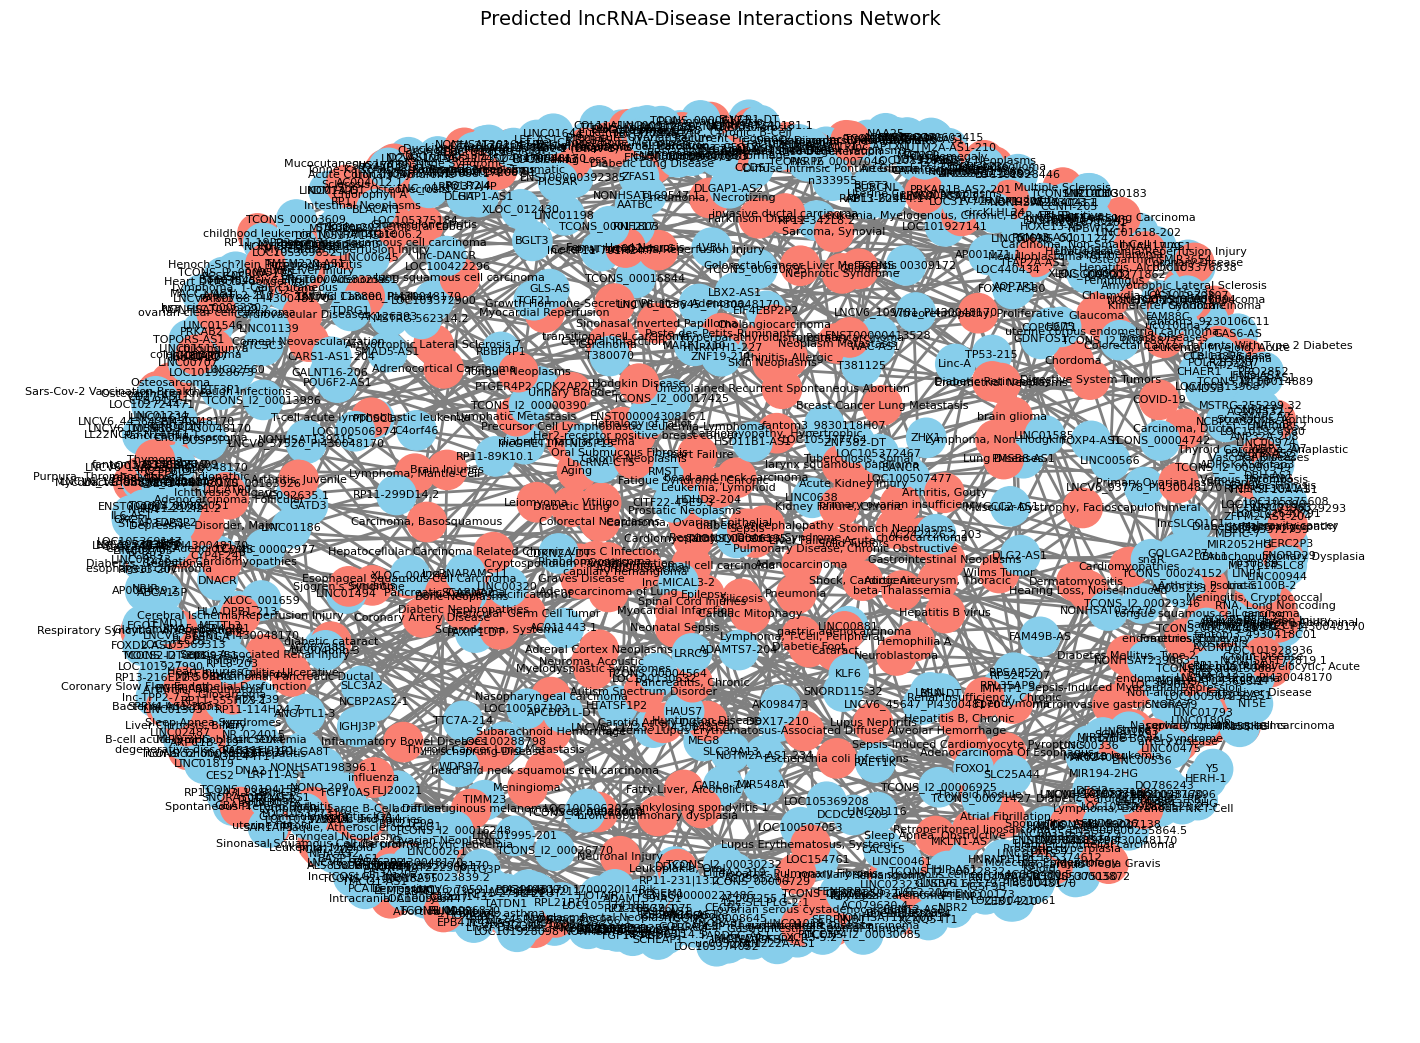

In [ ]:
import pandas as pd
import torch
import networkx as nx
import matplotlib.pyplot as plt

# 🔹 Define threshold for strong predictions
threshold = 0.7  # Adjust as needed

# 🔹 Apply sigmoid to predictions (convert logits to probabilities)
with torch.no_grad():
    pred_probs_np = torch.sigmoid(torch.tensor(preds)).cpu().numpy().flatten()

# 🔹 Convert negative edges to numpy (transpose for correct shape)
neg_edges = neg_edge_index.cpu().numpy().T

# 🔹 Ensure predictions and edges align
num_samples = min(len(pred_probs_np), len(neg_edges))
pred_probs_np = pred_probs_np[:num_samples]
neg_edges = neg_edges[:num_samples]

# 🔹 Load dataset
df = pd.read_csv('/content/lncRNA_disease.csv').reset_index(drop=True)

# 🔹 Encode lncRNA and Disease_Name as categories for consistent mapping
df["lncRNA_cat"] = df["lncRNA"].astype("category")
df["disease_cat"] = df["Disease_Name"].astype("category")

# 🔹 Create correct mappings from category codes
lncRNA_mapping = dict(enumerate(df["lncRNA_cat"].cat.categories))
disease_mapping = dict(enumerate(df["disease_cat"].cat.categories))

# 🔹 Extract high-confidence predictions
predicted_interactions = []

for i in range(num_samples):
    if pred_probs_np[i] > threshold:
        src, dst = neg_edges[i]

        # Decode lncRNA and disease names from category mapping
        lncRNA_name = lncRNA_mapping.get(src)
        disease_name = disease_mapping.get(dst)

        # Only add if both names are found
        if lncRNA_name and disease_name:
            predicted_interactions.append((lncRNA_name, disease_name))  # removed score

# 🔹 Create DataFrame of predictions (without score)
pred_df = pd.DataFrame(predicted_interactions, columns=["lncRNA", "Disease"])

# 🔹 Display top predictions
print("\n🔹 Top Predicted lncRNA-Disease Interactions 🔹\n")
print(pred_df.head(20))

# 🔹 Save for Cytoscape
pred_df.to_csv("predicted_interactions.csv", index=False)
print("✅ Predictions saved as 'predicted_interactions.csv' for Cytoscape.")

# 🔹 Visualization using NetworkX
G = nx.Graph()

# Add nodes and edges
for _, row in pred_df.iterrows():
    G.add_node(row["lncRNA"], type="lncRNA")
    G.add_node(row["Disease"], type="Disease")
    G.add_edge(row["lncRNA"], row["Disease"])

# Define node colors by type
node_colors = []
for node in G.nodes(data=True):
    node_type = node[1].get("type")
    if node_type == "lncRNA":
        node_colors.append("skyblue")
    elif node_type == "Disease":
        node_colors.append("salmon")
    else:
        node_colors.append("gray")

# Draw the network
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, k=0.4, seed=42)

nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=800,
    font_size=8,
    edge_color='gray',
    width=2.0
)

plt.title("Predicted lncRNA-Disease Interactions Network", fontsize=14)
plt.tight_layout()
plt.show()


✅ Saved high-confidence predictions to 'predicted_interactions.csv'


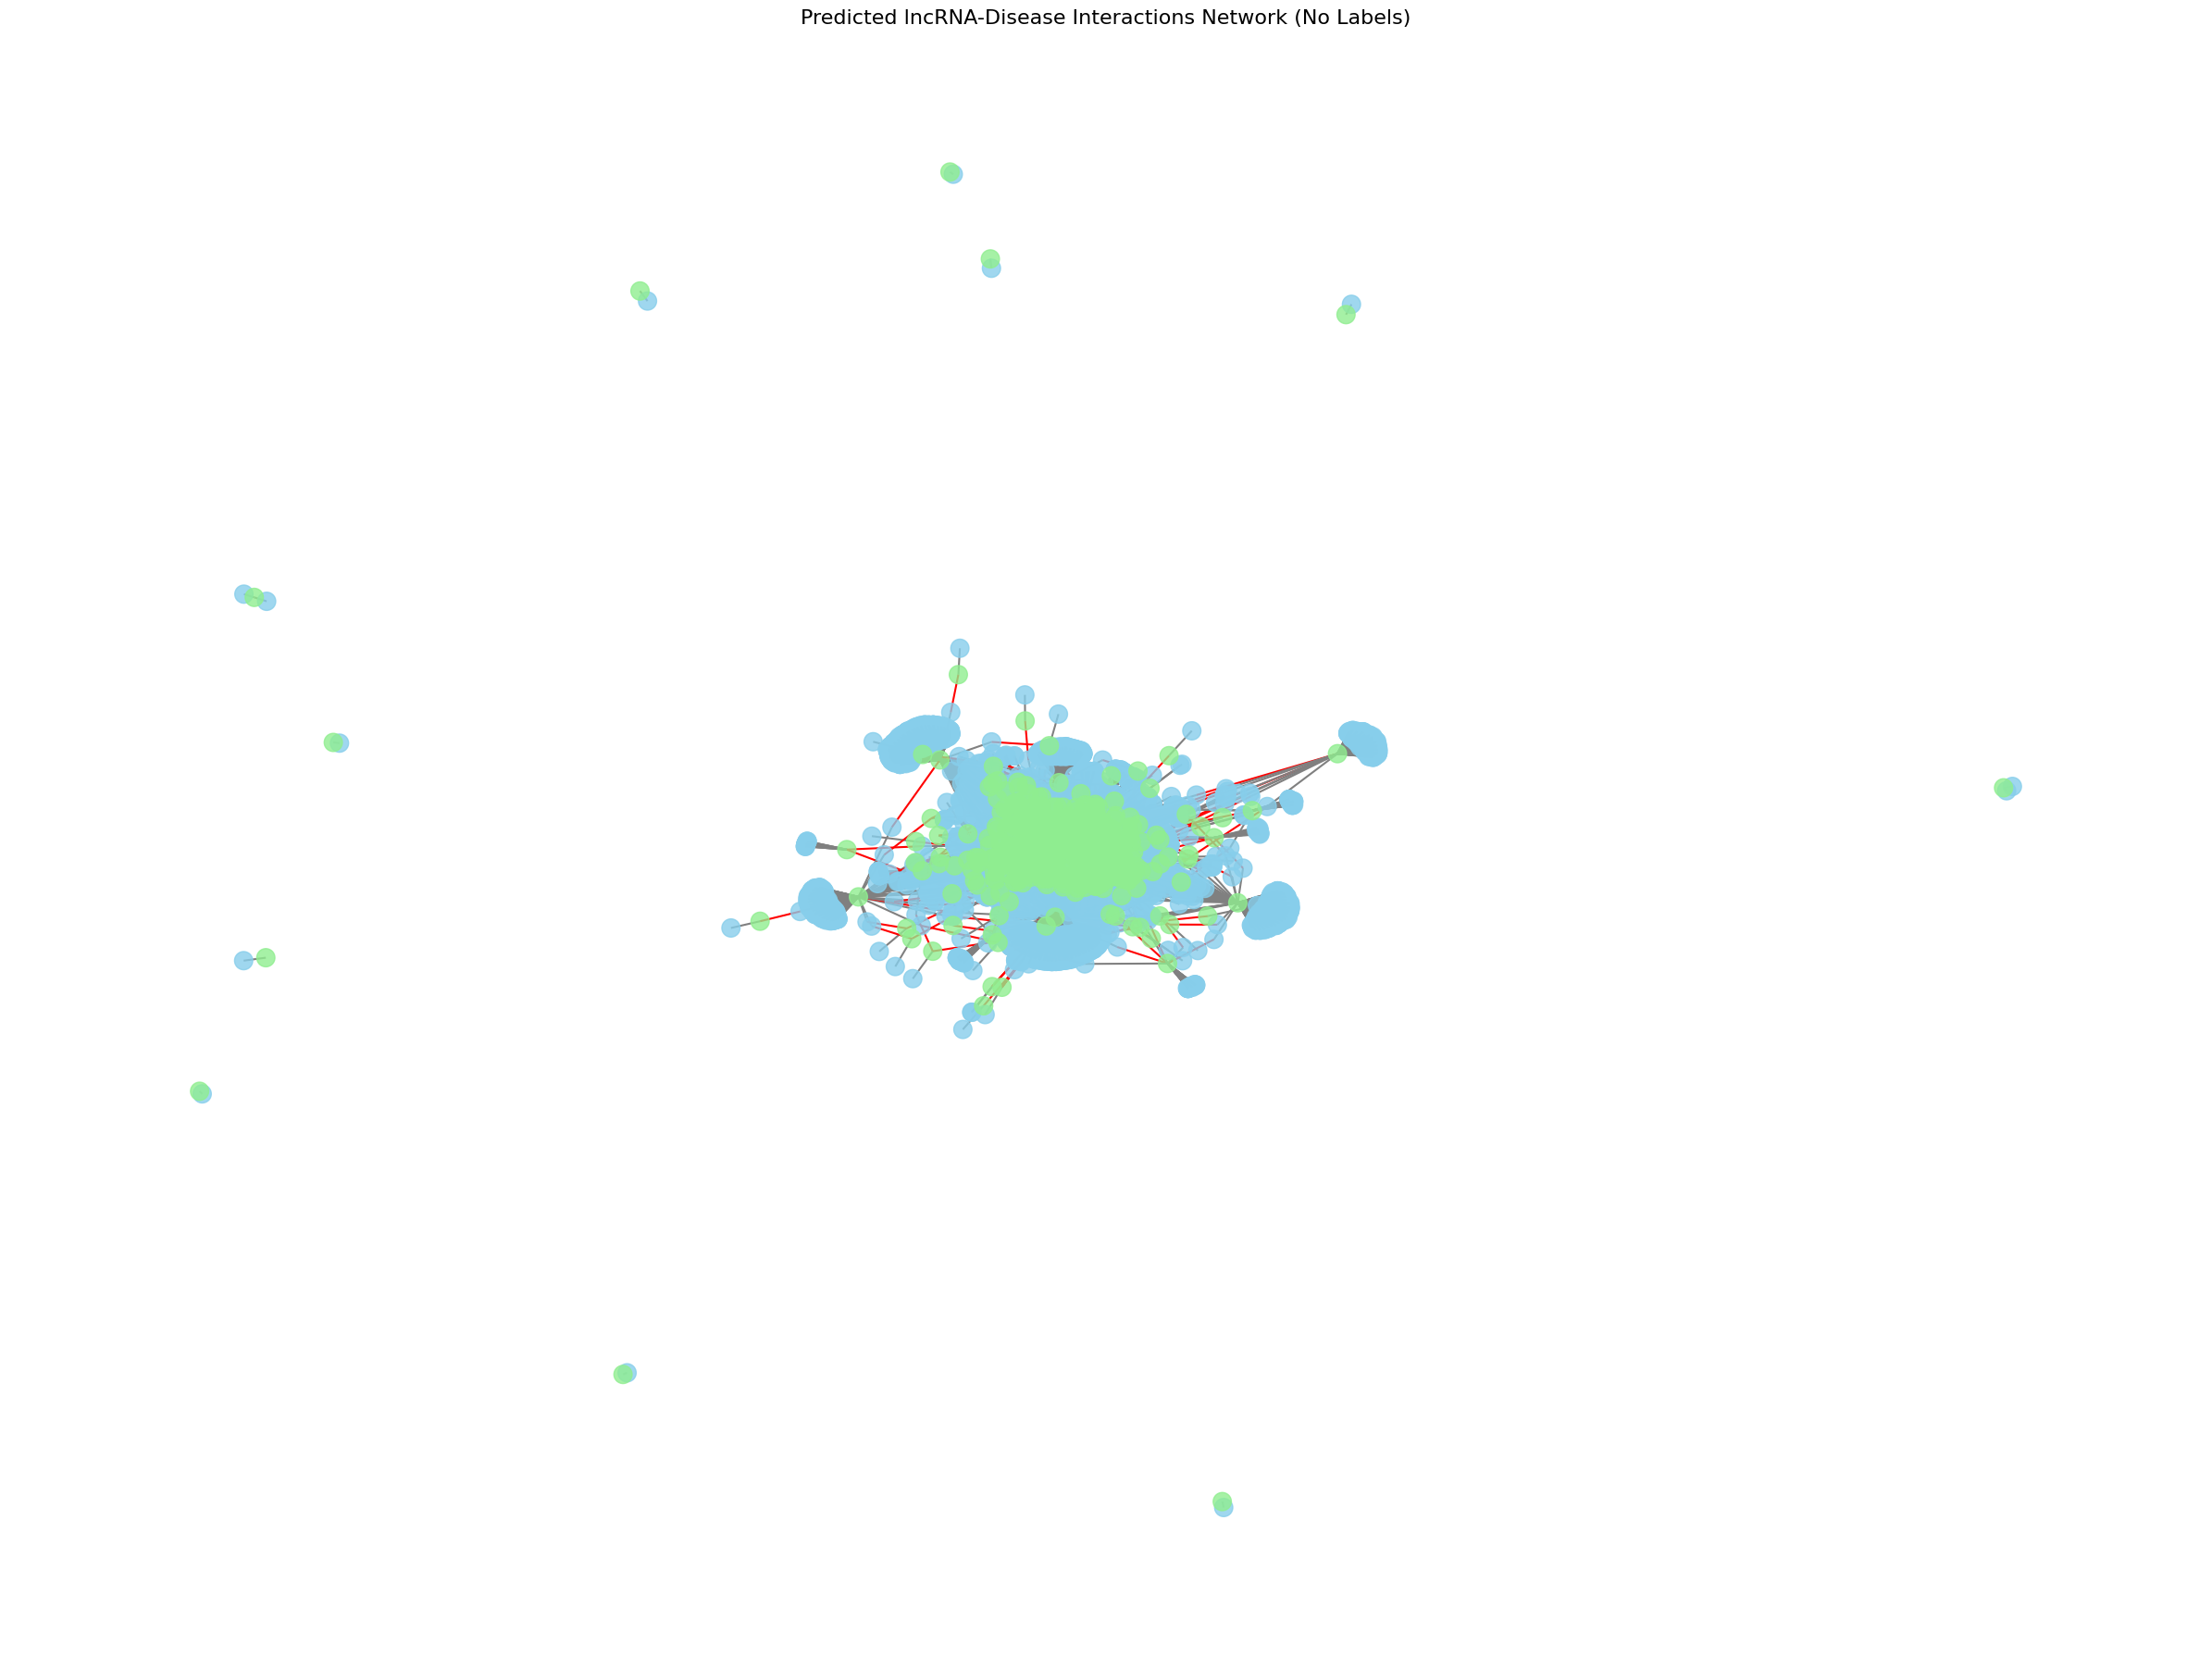

In [ ]:
import pandas as pd
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Threshold for strong predictions
threshold = 0.7

# Apply sigmoid to convert logits to probabilities
with torch.no_grad():
    pred_probs_np = torch.sigmoid(torch.tensor(preds)).cpu().numpy().flatten()

# Convert negative edge index to numpy and align with predictions
neg_edges = neg_edge_index.cpu().numpy().T
num_samples = min(len(pred_probs_np), len(neg_edges))
pred_probs_np = pred_probs_np[:num_samples]
neg_edges = neg_edges[:num_samples]

# Load lncRNA-disease dataset
df = pd.read_csv('/content/lncRNA_disease.csv')
df = df.reset_index(drop=True)

# Mapping from node index to lncRNA/disease name
lncRNAs = df["lncRNA"].unique().tolist()
diseases = df["Disease_Name"].unique().tolist()

# Build reverse lookup dictionaries
lncRNA_mapping = {i: name for i, name in enumerate(lncRNAs)}
disease_mapping = {i: name for i, name in enumerate(diseases)}

# Get existing edges from data
existing_edges = set()
for _, row in df.iterrows():
    src = lncRNAs.index(row["lncRNA"])
    dst = diseases.index(row["Disease_Name"])
    existing_edges.add((src, dst))

# Collect predicted interactions
predicted_interactions = []
new_edges = []

for i in range(num_samples):
    if pred_probs_np[i] > threshold:
        src, dst = neg_edges[i]

        # Ignore predictions for unknown indices
        if src >= len(lncRNAs) or dst >= len(diseases):
            continue

        # Skip if already exists
        if (src, dst) in existing_edges:
            continue

        lncRNA = lncRNA_mapping[src]
        disease = disease_mapping[dst]
        predicted_interactions.append((lncRNA, disease, pred_probs_np[i]))
        new_edges.append((lncRNA, disease))

# Save predictions to CSV
pred_df = pd.DataFrame(predicted_interactions, columns=["lncRNA", "Disease", "Prediction Score"])
pred_df = pred_df.sort_values(by="Prediction Score", ascending=False)
pred_df.to_csv("predicted_interactions.csv", index=False)
print("✅ Saved high-confidence predictions to 'predicted_interactions.csv'")

# Visualization
G = nx.Graph()

# Add nodes
for l in lncRNAs:
    G.add_node(l, type='lncRNA')
for d in diseases:
    G.add_node(d, type='disease')

# Add existing edges in grey
for (src, dst) in existing_edges:
    if src < len(lncRNAs) and dst < len(diseases):
        G.add_edge(lncRNA_mapping[src], disease_mapping[dst], color='gray')

# Add new predicted edges in red
for lnc, dis in new_edges:
    G.add_edge(lnc, dis, color='red')

# Define colors
node_colors = ['skyblue' if G.nodes[n]['type'] == 'lncRNA' else 'lightgreen' for n in G.nodes()]
edge_colors = [G[u][v]['color'] for u, v in G.edges()]

# Draw graph
plt.figure(figsize=(24, 18))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=200, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)
plt.title("Predicted lncRNA-Disease Interactions Network (No Labels)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()
